In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Deep-Learning-Car-Brand')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Deep-Learning-Car-Brand'

In [2]:
os.listdir()

['Procfile',
 'app.py',
 'README.md',
 'requirements.txt',
 'Transfer Learning Resnet 50.ipynb',
 'templates',
 '.ipynb_checkpoints',
 'static',
 'Datasets']

In [3]:
 #import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
len(training_set)

2

In [23]:
type(training_set)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [14]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
len(test_set)

2

In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 23s 15s/step - loss: 3.2218 - accuracy: 0.3333 - val_loss: 20.8728 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 19s 13s/step - loss: 13.7629 - accuracy: 0.3021 - val_loss: 6.3622 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 3.2777 - accuracy: 0.4167 - val_loss: 4.4444 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 19s 13s/step - loss: 6.5375 - accuracy: 0.3438 - val_loss: 4.1361 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 19s 13s/step - loss: 3.8903 - accuracy: 0.4167 - val_loss: 3.6865 - val_accuracy: 0.1897
Epoch 6/50
2/2 [==============================] - 19s 13s/step - loss: 2.7241 - accuracy: 0.5000 - val_loss: 7.6294 - val_accuracy: 0.3621
Epoch 7/50
2/2 [==============================] - 19s 13s/step - loss: 4.6732 - accuracy: 0.5729 - val_loss: 7.3205 - val_accuracy: 0.2586
Epoch 8/50
2/2 [=========

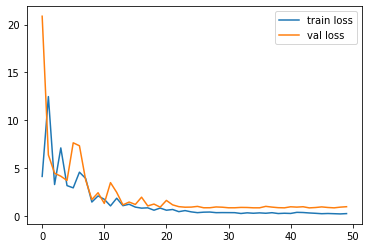

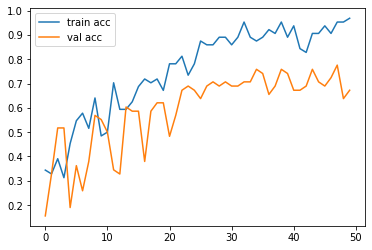

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [26]:

y_pred = model.predict(test_set)


In [27]:
y_pred

array([[3.85418832e-02, 5.00769876e-02, 9.11381125e-01],
       [1.34774565e-03, 6.11420691e-01, 3.87231559e-01],
       [9.15219009e-01, 3.58894542e-02, 4.88916002e-02],
       [4.30865809e-02, 5.37302531e-03, 9.51540411e-01],
       [1.22424262e-02, 9.25260723e-01, 6.24969527e-02],
       [4.07800138e-01, 2.12822020e-01, 3.79377812e-01],
       [3.52414185e-03, 9.85774755e-01, 1.07011059e-02],
       [2.86152083e-02, 6.69773877e-01, 3.01611006e-01],
       [3.88970450e-02, 1.72500104e-01, 7.88602829e-01],
       [5.81412166e-02, 2.30833814e-01, 7.11025000e-01],
       [6.56230927e-01, 8.41366127e-03, 3.35355431e-01],
       [3.24160270e-02, 3.52046847e-01, 6.15537167e-01],
       [3.63895483e-02, 8.71505380e-01, 9.21050310e-02],
       [9.74103451e-01, 7.35154375e-03, 1.85449515e-02],
       [3.70942689e-02, 8.53802621e-01, 1.09103143e-01],
       [2.75588691e-01, 3.27407457e-02, 6.91670597e-01],
       [8.70656967e-02, 3.92677300e-02, 8.73666644e-01],
       [3.21811698e-02, 2.46496

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1])

In [ ]:
for x,y,z in zip(test_set,)

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_resnet50.h5')

In [52]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))



In [53]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

x=np.expand_dims(x,axis=0)
#print(x.shape)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [56]:
model.predict(img_data)

array([[0.00288179, 0.6579276 , 0.33919066]], dtype=float32)

In [57]:
a=np.argmax(model.predict(img_data), axis=1)

In [58]:
a==1

array([ True])